# Obesity Risk Assessment Model
### Group Tea
**Members:**

`Jason Carlo O. Obiso`,
`Glyke Kinney P. Alivio`,
`Chlarence Callelero`,
`James Epijul Costan`



## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Loading and Preprocessing Data

In [ ]:
df = pd.read_csv(r'/content/obesity_estimation_data.csv')

X = df.drop(['NObeyesdad'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

(2086, 14)


## Determining Optimum Number of Clusters

In [ ]:
# Determine optimal number of clusters
inertia = []
silhouette_scores = []
max_clusters = 10
for k in range(2, max_clusters + 1):
    model = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

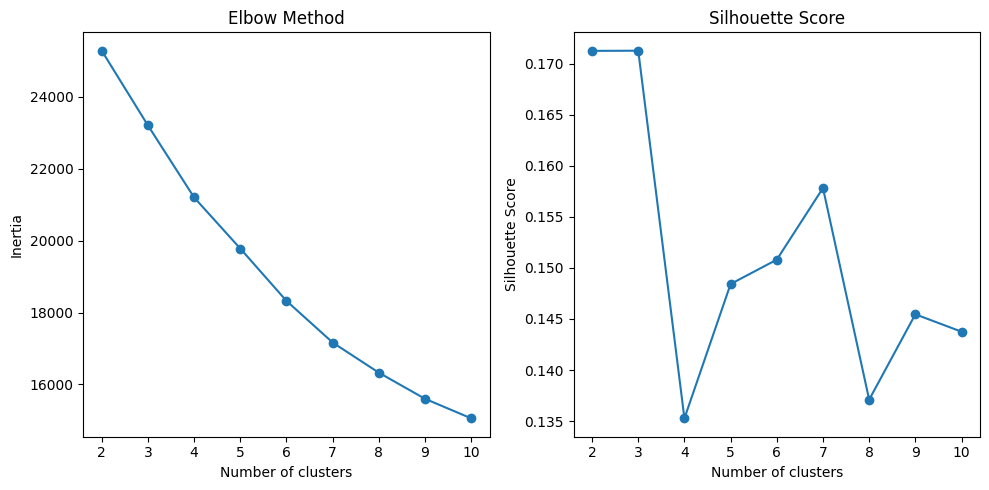

In [ ]:
# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
num_clusters = 7 # Based on known obesity levels and silhouette score

final_model = KMeans(n_clusters=num_clusters, n_init=10, max_iter=300, random_state=42)
final_model.fit(X_scaled)

KMeans(n_clusters=7, n_init=10, random_state=42)

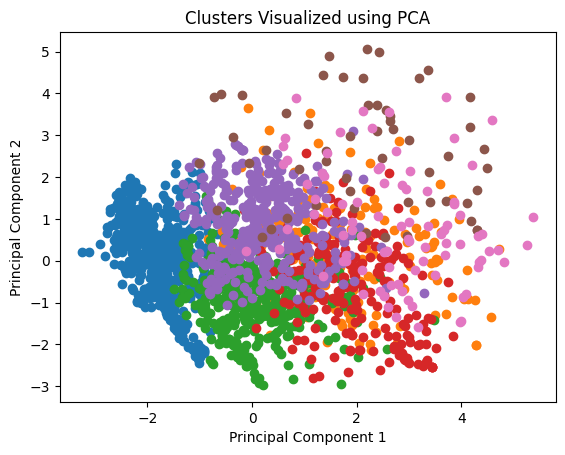

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters using PCA
plt.figure()
for i in range(num_clusters):
    plt.scatter(X_pca[final_model.labels_ == i, 0], X_pca[final_model.labels_ == i, 1], label=f'Cluster {i+1}')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

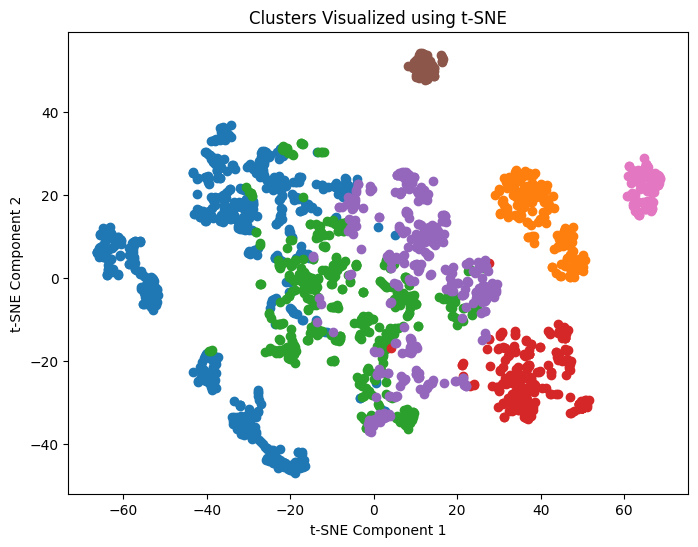

In [ ]:
# Reduce dimensionality using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the clusters using t-SNE
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[final_model.labels_ == i, 0], X_tsne[final_model.labels_ == i, 1], label=f'Cluster {i+1}')
plt.title('Clusters Visualized using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
# Print counts of points in each cluster
unique_labels, label_counts = np.unique(final_model.labels_, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label + 1}: {count} points")

Cluster 1: 687 points
Cluster 2: 181 points
Cluster 3: 461 points
Cluster 4: 235 points
Cluster 5: 378 points
Cluster 6: 55 points
Cluster 7: 89 points


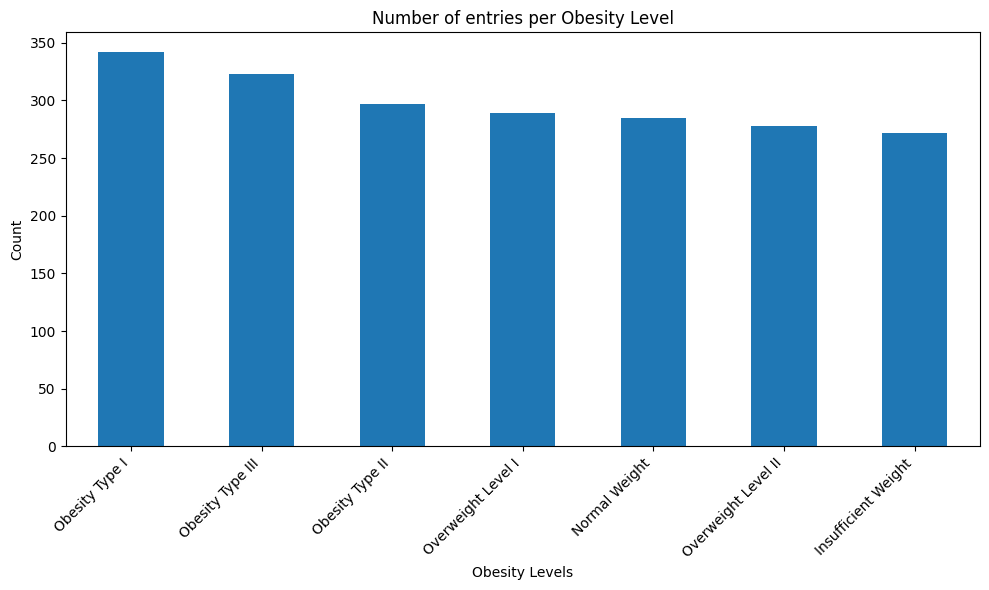

In [ ]:
# Count occurrences of each unique value in the 'obesity_level' column
value_counts = df['NObeyesdad'].value_counts()

# Map original numbers to new categories
category_mapping = {
    0: 'Insufficient Weight',
    1: 'Normal Weight',
    2: 'Overweight Level I',
    3: 'Overweight Level II',
    4: 'Obesity Type I',
    5: 'Obesity Type II',
    6: 'Obesity Type III'
}

# Replace numeric values with categories
df['NObeyesdad'] = df['NObeyesdad'].map(category_mapping)

# Count occurrences of each unique value in the 'obesity_level' column
value_counts = df['NObeyesdad'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Obesity Levels')
plt.ylabel('Count')
plt.title('Number of entries per Obesity Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Inertia: 17165.77639093919
Average Silhouette Score: 0.15782668972344377


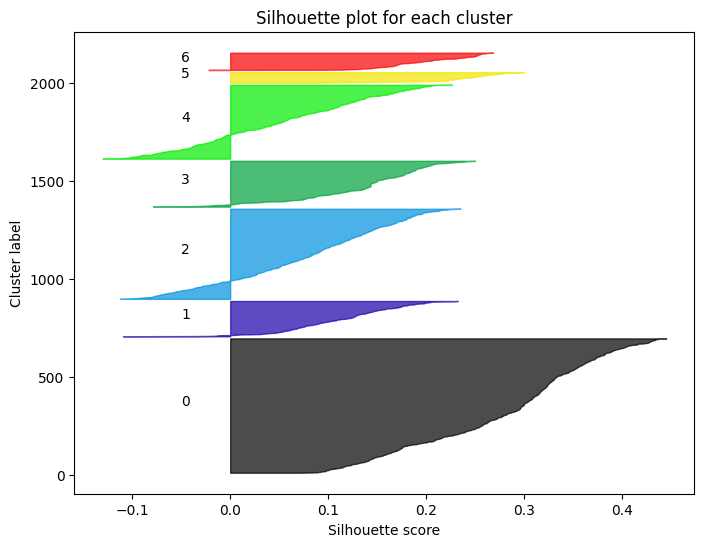

In [ ]:
# Evaluate the model
inertia = final_model.inertia_
silhouette_avg = silhouette_score(X_scaled, final_model.labels_)
silhouette_values = silhouette_samples(X_scaled, final_model.labels_)

print(f"Inertia: {inertia}")
print(f"Average Silhouette Score: {silhouette_avg}")

# Plot silhouette scores for each sample
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = silhouette_values[final_model.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.title("Silhouette plot for each cluster")
plt.xlabel("Silhouette score")
plt.ylabel("Cluster label")
plt.show()

## Evaluation
An inertia value of 17165.78 indicates the total within-cluster sum of squares, which means the points within each cluster are relatively close to their centroids.

An average silhouette score of 0.1578 suggests that the clusters are somewhat separated but there is still overlap between them.